# Assignment 5 Due: Thursday 10/3

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided different threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf # needed for p-value calculation
import scipy.stats as stats

%matplotlib inline

# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.


In [16]:
index, M, M_error = np.loadtxt('data/Wmass_data.txt', unpack=True)

**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [17]:
weights = 1 / M_error**2

# Calculate the weighted mean
weighted_mean = np.sum(M * weights) / np.sum(weights)

# Calculate the uncertainty in the weighted mean
weighted_mean_error = np.sqrt(1 / np.sum(weights))

# Print the results
print(f"Weighted mean of W mass: {weighted_mean:} GeV/c^2")
print(f"Uncertainty in the weighted mean: {weighted_mean_error:} GeV/c^2")

# The mean is close to the bolded value. The error is slightly smaller. 

Weighted mean of W mass: 80.37914612783635 GeV/c^2
Uncertainty in the weighted mean: 0.010338187803490969 GeV/c^2


**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [18]:
# Calculate the chi-squared value
chisq = np.sum(((M - weighted_mean) ** 2) / M_error**2)

# Degrees of freedom
dof = len(M) - 1

# Reduced chi-squared
reduced_chisq = chisq / dof

# Calculate p-value
p_value = sf.gammaincc(dof / 2.0, chisq / 2.0)

print(f"Chi-squared: {chisq}")
print(f"Degrees of freedom: {dof}")
print(f"Reduced Chi-squared: {reduced_chisq}")
print(f"P-value: {p_value:}")

Chi-squared: 8.70683651333262
Degrees of freedom: 8
Reduced Chi-squared: 1.0883545641665775
P-value: 0.3676272331907399


**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

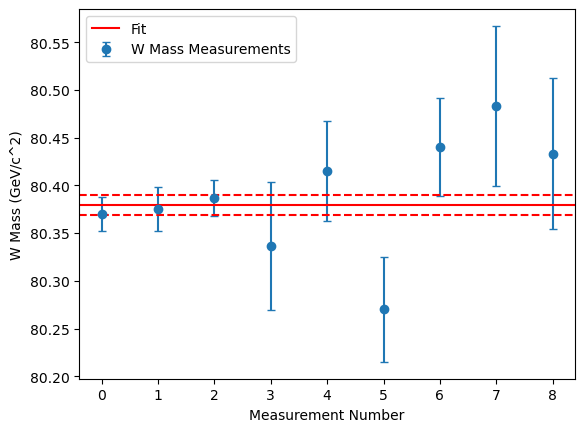

Fitted p_0 value: 80.37914612783638 GeV/c^2
Fitted p_0 error value: 0.010338187745887642 GeV/c^2


In [19]:
# Define a constant function to fit
def constant_func(x, p0):
    return p0

# Fit the constant model to the data
popt, pcov = curve_fit(constant_func, index, M, sigma=M_error, absolute_sigma=True)
p0 = popt[0]  # Best-fit value of p0
p0_error = np.sqrt(np.diag(pcov))[0]  # Uncertainty in p0

# Plot W mass vs. measurement number with error bars
plt.errorbar(index, M, yerr=M_error, fmt='o', label='W Mass Measurements', capsize=3)

# Plot the best-fit line (constant)
plt.axhline(y=p0, color='r', linestyle='-', label='Fit')
plt.axhline(y=p0-p0_error, color='r', linestyle='--')
plt.axhline(y=p0+p0_error, color='r', linestyle='--')

# Add labels and legend
plt.xlabel('Measurement Number')
plt.ylabel('W Mass (GeV/c^2)')
plt.legend()

# Show the plot
plt.show()

print(f"Fitted p_0 value: {p0} GeV/c^2")
print(f"Fitted p_0 error value: {p0_error} GeV/c^2")

#They have very similar answers, they differ in some far off exponent but due to error being greater (decimal point wise).

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

There is an approchable video that reviews the history of the proton size and its measurements: https://www.youtube.com/watch?v=C5B_ZfGy4d0

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

In [20]:
index, M, M_error = np.loadtxt('data/proton_radius_data.txt', unpack=True)

**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [21]:
weights = 1 / M_error**2

# Calculate the weighted mean
weighted_mean = np.sum(M * weights) / np.sum(weights)

# Calculate the uncertainty in the weighted mean
weighted_mean_error = np.sqrt(1 / np.sum(weights))

# Print the results
print(f"Weighted mean of Proton Radius: {weighted_mean:} fm")
print(f"Uncertainty in the weighted mean: {weighted_mean_error:} fm")

# The mean is close to the bolded value. The error is slightly smaller. 

Weighted mean of Proton Radius: 0.8416225242550589 fm
Uncertainty in the weighted mean: 0.0003337320304863616 fm


**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [22]:
# Calculate the chi-squared value
chisq = np.sum(((M - weighted_mean) ** 2) / M_error**2)

# Degrees of freedom
dof = len(M) - 1

# Reduced chi-squared
reduced_chisq = chisq / dof

# Calculate p-value
p_value = sf.gammaincc(dof / 2.0, chisq / 2.0)

print(f"Chi-squared: {chisq}")
print(f"Degrees of freedom: {dof}")
print(f"Reduced Chi-squared: {reduced_chisq}")
print(f"P-value: {p_value}")

Chi-squared: 222.89861827135272
Degrees of freedom: 14
Reduced Chi-squared: 15.921329876525194
P-value: 1.1145915261046976e-39


**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

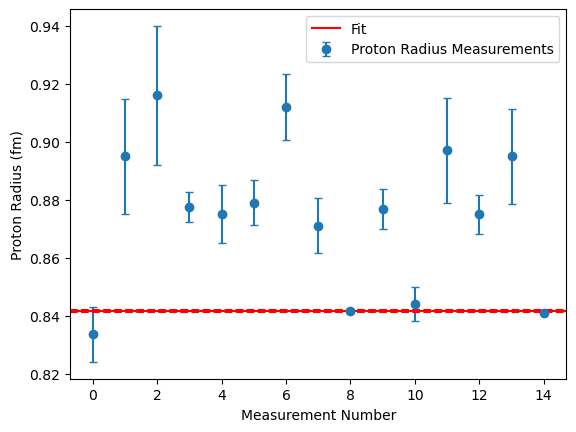

Fitted p_0 value: 0.8416225241593092 fm
Fitted p_0 error value: 0.00033373203056550363 fm


In [23]:
# Fit the constant model to the data
popt, pcov = curve_fit(constant_func, index, M, sigma=M_error, absolute_sigma=True)
p0 = popt[0]  # Best-fit value of p0
p0_error = np.sqrt(np.diag(pcov))[0]  # Uncertainty in p0

# Plot W mass vs. measurement number with error bars
plt.errorbar(index, M, yerr=M_error, fmt='o', label='Proton Radius Measurements', capsize=3)

# Plot the best-fit line (constant)
plt.axhline(y=p0, color='r', linestyle='-', label='Fit')
plt.axhline(y=p0-p0_error, color='r', linestyle='--')
plt.axhline(y=p0+p0_error, color='r', linestyle='--')

# Add labels and legend
plt.xlabel('Measurement Number')
plt.ylabel('Proton Radius (fm)')
plt.legend()

# Show the plot
plt.show()

print(f"Fitted p_0 value: {p0} fm")
print(f"Fitted p_0 error value: {p0_error} fm")

#They have very similar answers, they differ in some far off exponent but due to error being greater (decimal point wise).

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from many which result from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we refer to as our signal, whereas the ones we are not interested in we refer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

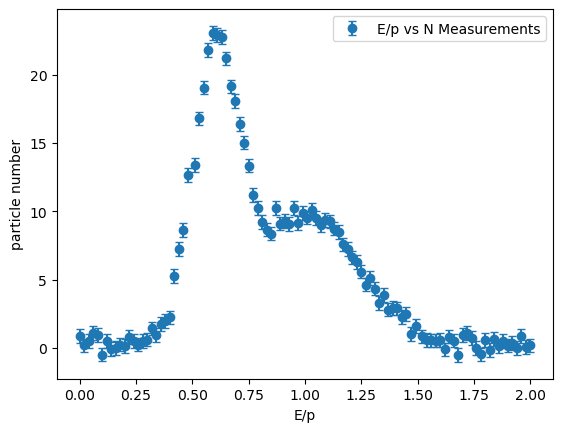

In [24]:

Ep, N, N_error = np.loadtxt('data/Ep_data.txt', unpack=True)


plt.errorbar(Ep, N, yerr=N_error, fmt='o', label='E/p vs N Measurements', capsize=3)
plt.xlabel('E/p')
plt.ylabel('particle number')
plt.legend()

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two python functions, one that returns a value computed from a Gaussian functions, and another python function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. So we want to fit our E/p distribution with function $G_1(x) + G_2(x)$. The image below shows my fit, with the $G_1(x) + G_2(x)$ fit being the black curve. From this fit I can use the fit parameters to draw $G_1(x)$ (blue curve) and $G_2(x)$ (red curve). 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

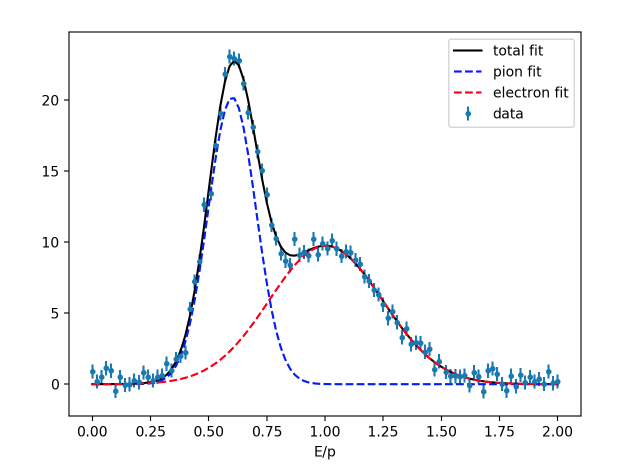

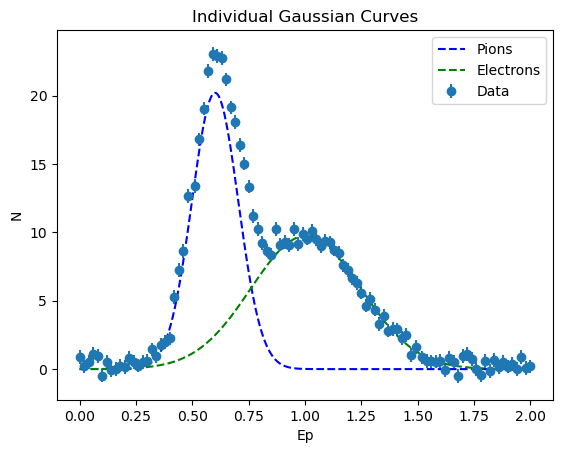

In [25]:

def g1g2(x, p1,p2,p3,d1,d2,d3):
    return p1*np.exp(-(x-p2)**2/(2*p3))+d1*np.exp(-(x-d2)**2/(2*d3))

def gaussian(x, p1, p2, p3):
    return p1 * np.exp(-(x - p2) ** 2 / (2 * p3))
    
initial_guess = [1, 1, 1, 1, 1, 1]


popt, pcov = curve_fit(g1g2, Ep, N, sigma=N_error, absolute_sigma=True, p0=initial_guess)

p1, p2, p3, d1, d2, d3 = popt


x_fit = np.linspace(min(Ep), max(Ep), 1000)


plt.errorbar(Ep, N, yerr=N_error, fmt='o', label='Data')

plt.plot(x_fit, gaussian(x_fit, p1, p2, p3), label='Pions', color='blue', linestyle="--")
plt.plot(x_fit, gaussian(x_fit, d1, d2, d3), label='Electrons', color='green', linestyle="--")

# Add labels and legend
plt.xlabel('Ep')
plt.ylabel('N')
plt.title('Individual Gaussian Curves')
plt.legend()

**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

In [26]:
# Calculate the model predictions (fitted values)
fitted_values = g1g2(Ep, *popt)

# Calculate chi-squared
chi_squared = np.sum(((N - fitted_values) ** 2) / N_error ** 2)

# Degrees of freedom
n = len(N)  # number of data points
k = len(popt)  # number of parameters
dof = n - k

# Reduced chi-squared
chi_squared_reduced = chi_squared / dof

# p-value from chi-squared distribution
p_value =sf.gammaincc(dof/2,chi_squared/2)

# Print the results
print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {dof}")
print(f"Reduced Chi-squared: {chi_squared_reduced}")
print(f"p-value: {p_value}")

Chi-squared: 108.42094110108559
Degrees of freedom: 94
Reduced Chi-squared: 1.1534142670328253
p-value: 0.1467723007654946


**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit (e.g. reproduce my fit figure). 

In [27]:
#Above

**e)** We can use the $E/p$ distribution to try to select the maximum number of electrons while minimizing the number of pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold value to the E/p = 2. Do a similar thing for the pion distribution. 

Below is the your graph in part f) should look like.

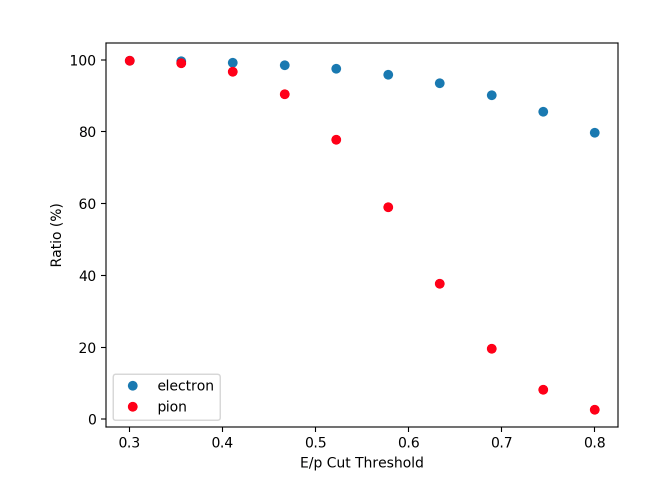



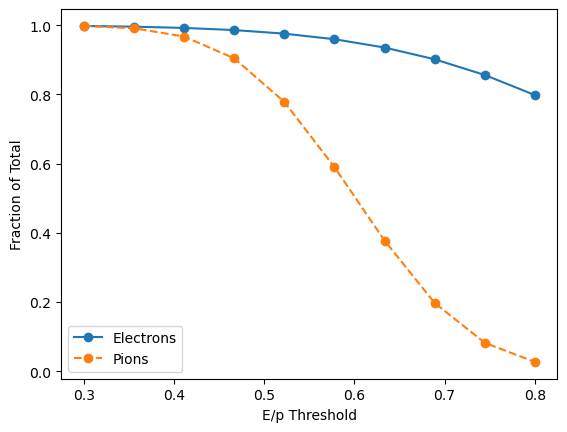

In [28]:
e_tot, error1 = quad(gaussian, 0, 2, args=(d1, d2, d3))
pi_tot, error2 = quad(gaussian, 0, 2, args=(p1, p2, p3))
thresholds = np.linspace(0.3, 0.8, 10)

e_sig = []
pi_sig = []

for threshold in thresholds:
    e_above, _ = quad(gaussian, threshold, 2, args=(d1, d2, d3))
    pi_above, _ = quad(gaussian, threshold, 2, args=(p1, p2, p3))
    
    e_sig.append(e_above)
    pi_sig.append(pi_above)


e_sig = np.array(e_sig)
pi_sig = np.array(pi_sig)


plt.plot(thresholds, e_sig / e_tot, label='Electrons', marker='o')
plt.plot(thresholds, pi_sig / pi_tot, label='Pions', marker='o', linestyle='--')


plt.xlabel('E/p Threshold')
plt.ylabel('Fraction of Total')
plt.legend()

plt.show()


**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

In [29]:
#Above

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

In [30]:
closest_index = np.argmin(np.abs(e_sig / e_tot - 0.90))

print((pi_sig / pi_tot)[closest_index])

#Its around 20 percent.

0.19722365574965625
